In [1]:
!pip install gdown
import pandas as pd
import gdown

url = 'https://drive.google.com/uc?id=1-WZKE5xHw-3m_SL_PtOgwkzdFROIWqih'
output = 'reviews.csv'
gdown.download(url, output, quiet=False)

raw_df = pd.read_csv('reviews.csv')
# We'll start with a small subset of our data to test things out, then we'll add more
df = raw_df[raw_df['Score'] > 0][:10000]
df.head()

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.
Downloading...
From: https://drive.google.com/uc?id=1-WZKE5xHw-3m_SL_PtOgwkzdFROIWqih
To: C:\Users\KIIT\Desktop\ML\reviews.csv
100%|███████████████████████████████████████████████████████████████████████████████| 301M/301M [03:40<00:00, 1.36MB/s]


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Score'])

In [3]:
y_train[0]

5

In [4]:
# Keras
from tensorflow.keras.preprocessing.text import Tokenizer

VOCAB_SIZE = 10000

tokenizer = Tokenizer(num_words=VOCAB_SIZE)

# we will only consider words on our training set if any word present which is in our test set we'll throw it out
tokenizer.fit_on_texts(X_train)

In [5]:
# maps every word to a number
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'to': 5,
 'it': 6,
 'of': 7,
 'is': 8,
 'this': 9,
 'br': 10,
 'for': 11,
 'in': 12,
 'my': 13,
 'that': 14,
 'but': 15,
 'with': 16,
 'not': 17,
 'have': 18,
 'you': 19,
 'was': 20,
 'are': 21,
 'as': 22,
 'they': 23,
 'on': 24,
 'like': 25,
 'so': 26,
 'these': 27,
 'coffee': 28,
 'good': 29,
 'them': 30,
 'be': 31,
 'or': 32,
 'taste': 33,
 'just': 34,
 'great': 35,
 'at': 36,
 'one': 37,
 'if': 38,
 'product': 39,
 'very': 40,
 'all': 41,
 'flavor': 42,
 'can': 43,
 "it's": 44,
 'we': 45,
 'from': 46,
 'has': 47,
 'will': 48,
 'had': 49,
 'more': 50,
 'when': 51,
 'would': 52,
 'me': 53,
 'love': 54,
 'than': 55,
 'no': 56,
 'other': 57,
 'out': 58,
 'really': 59,
 'some': 60,
 'food': 61,
 'tea': 62,
 'amazon': 63,
 'only': 64,
 'about': 65,
 'up': 66,
 'get': 67,
 'much': 68,
 'too': 69,
 'an': 70,
 "don't": 71,
 'cup': 72,
 'best': 73,
 'use': 74,
 'also': 75,
 'were': 76,
 'because': 77,
 'your': 78,
 'little': 79,
 'tried': 80,
 'time':

In [6]:
X_train_enc = tokenizer.texts_to_sequences(X_train)
X_test_enc = tokenizer.texts_to_sequences(X_test)

# we get a number for each word
print(X_train[0])
print(X_train_enc[0])

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
[1, 33, 8, 35, 15, 6, 437, 53, 4, 919, 5348, 46, 1, 1520, 212, 135, 21, 1126, 1750, 75, 1520, 900, 8, 312, 4, 133, 5, 1838, 798, 42]


In [7]:
import numpy as np
# we find the length of the encoded sequences we find out how long it is and then find the mean of all those
review_lengths = [len(t) for t in X_train_enc]
np.mean(review_lengths)

76.62453333333333

(array([6.777e+03, 6.060e+02, 7.900e+01, 2.500e+01, 6.000e+00, 5.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   9. ,  155.1,  301.2,  447.3,  593.4,  739.5,  885.6, 1031.7,
        1177.8, 1323.9, 1470. ]),
 <BarContainer object of 10 artists>)

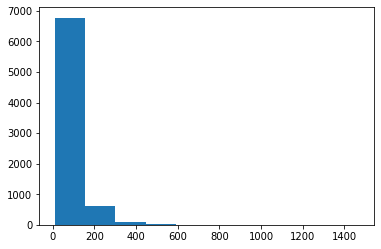

In [8]:
import matplotlib.pyplot as plt

plt.hist(review_lengths)

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_LEN = 100
X_train_enc = pad_sequences(X_train_enc, maxlen= MAX_LEN, padding="post")
X_test_enc = pad_sequences(X_train_enc,maxlen = MAX_LEN,padding="post")

np.mean([len(t) for t in X_train_enc])

100.0

In [10]:
X_train_enc[0]
#after 28 padding is added as the first sentence was not too long

array([   1,   33,    8,   35,   15,    6,  437,   53,    4,  919, 5348,
         46,    1, 1520,  212,  135,   21, 1126, 1750,   75, 1520,  900,
          8,  312,    4,  133,    5, 1838,  798,   42,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0])

In [11]:
from tensorflow.keras.utils import to_categorical

y_train_enc = to_categorical(y_train)
y_test_enc = to_categorical(y_test)
print(y_train.iloc[0:10])
print(y_train_enc[0:10])

5231    1
1008    3
6732    4
9168    5
2286    3
9375    1
8618    4
2315    5
2568    4
1561    5
Name: Score, dtype: int64
[[0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


In [12]:
from tensorflow.keras import Sequential
#sequential helps in running the model one after the other
from tensorflow.keras.layers import Embedding, Dense, GlobalMaxPool1D, Conv1D
#embedding helps to assign to each word see king queen man woman example  
# GlobalMaxPool1D  --> text is 1D and what GlobalMaxPool1D does is that it takes the words in a line and squashes them alltogether for which it took all the 100 words in a row and merged them in one
# convolution iterates like a sliding window it takes a set of words at once and judges its sentiment by looking at words like "not bad" which shoud actually be a positive sentiment but not and bad are in the list for negative sentiment
EMBEDDING_DIMENSION = 50

model = Sequential()
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIMENSION, input_length=MAX_LEN))
model.add(Conv1D(50, 4, 1, activation='relu'))
# 4 is the kernel size that is how many words it looks at once 1 is the number of strides that is how far we want to move the window after a iteration
# we use a activation function named relu which stands for rectified linear unit whose function is like to return 0 if its less than 0 or else return what it was before
model.add(GlobalMaxPool1D())
# 6 possible outputs possible dense layer is like logistic regression(checks whether input is greater than a threshold) softmax function is highly used it takes input and ouputs as either 0 or 1 sentiment
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# the models predicts the probability of having x star review so what categorical crossentropy does is that it estimates how much the model was suprised with the outcome

# in embedding layer we get that it has 100 words out of which 50 of which actually holds a value
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           500000    
                                                                 
 conv1d (Conv1D)             (None, 97, 50)            10050     
                                                                 
 global_max_pooling1d (Globa  (None, 50)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 6)                 306       
                                                                 
Total params: 510,356
Trainable params: 510,356
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(
    X_train_enc,
    y_train_enc,
    epochs=30,
    batch_size=64,
    validation_split=0.1,
)
# epochs refers to the number of iterations the model through different batches
# batch size refers to the number of examples the model will look at once bigger the batch size faster the train
# overtime the model got better the loss decreased over time and the accuracy increased
# validation split of 10% other than the training set fetches validation loss and validation accuracy
# if we run it from here we observe our model to start which is aldready trained to start over compile again
# validation accuracy is less than the normal accuracy overfitting

Epoch 1/30
106/106 [==============================] - 3s 21ms/step - loss: 1.3312 - accuracy: 0.6053 - val_loss: 1.1800 - val_accuracy: 0.6160
Epoch 2/30
106/106 [==============================] - 2s 18ms/step - loss: 1.1037 - accuracy: 0.6209 - val_loss: 1.0684 - val_accuracy: 0.6173
Epoch 3/30
106/106 [==============================] - 2s 17ms/step - loss: 0.9340 - accuracy: 0.6514 - val_loss: 0.9278 - val_accuracy: 0.6547
Epoch 4/30
106/106 [==============================] - 2s 18ms/step - loss: 0.7560 - accuracy: 0.7203 - val_loss: 0.8555 - val_accuracy: 0.6840
Epoch 5/30
106/106 [==============================] - 2s 18ms/step - loss: 0.5995 - accuracy: 0.7834 - val_loss: 0.8228 - val_accuracy: 0.6960
Epoch 6/30
106/106 [==============================] - 2s 19ms/step - loss: 0.4590 - accuracy: 0.8585 - val_loss: 0.8137 - val_accuracy: 0.7027
Epoch 7/30
106/106 [==============================] - 2s 18ms/step - loss: 0.3394 - accuracy: 0.9163 - val_loss: 0.8291 - val_accuracy: 0.6987

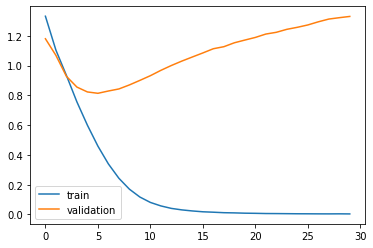

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'])
plt.show()
# model is overfitted as it does good in training set and worse in validation set

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalMaxPool1D, Conv1D, Dropout
# dropout layer is a tool to handle overfitting which randomly assigns some input to 0
EMBEDDING_DIMENSION = 50

model = Sequential()
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIMENSION, input_length=MAX_LEN))
model.add(Conv1D(50, 4, 1, activation='relu'))
model.add(Dropout(0.5))
model.add(GlobalMaxPool1D())
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 50)           500000    
                                                                 
 conv1d_1 (Conv1D)           (None, 97, 50)            10050     
                                                                 
 dropout (Dropout)           (None, 97, 50)            0         
                                                                 
 global_max_pooling1d_1 (Glo  (None, 50)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_1 (Dense)             (None, 6)                 306       
                                                                 
Total params: 510,356
Trainable params: 510,356
Non-trainable params: 0
________________________________________________

In [16]:
history = model.fit(
    X_train_enc,
    y_train_enc,
    epochs=30,
    batch_size=64,
    validation_split=0.1,
)

Epoch 1/30
106/106 [==============================] - 3s 23ms/step - loss: 1.2890 - accuracy: 0.5982 - val_loss: 1.2936 - val_accuracy: 0.6160
Epoch 2/30
106/106 [==============================] - 3s 24ms/step - loss: 1.0848 - accuracy: 0.6222 - val_loss: 1.1633 - val_accuracy: 0.6253
Epoch 3/30
106/106 [==============================] - 2s 22ms/step - loss: 0.9504 - accuracy: 0.6461 - val_loss: 1.1134 - val_accuracy: 0.6680
Epoch 4/30
106/106 [==============================] - 2s 21ms/step - loss: 0.8221 - accuracy: 0.6996 - val_loss: 1.0355 - val_accuracy: 0.6853
Epoch 5/30
106/106 [==============================] - 2s 22ms/step - loss: 0.7014 - accuracy: 0.7464 - val_loss: 0.9682 - val_accuracy: 0.6867
Epoch 6/30
106/106 [==============================] - 2s 21ms/step - loss: 0.5815 - accuracy: 0.7988 - val_loss: 0.9340 - val_accuracy: 0.6933
Epoch 7/30
106/106 [==============================] - 2s 21ms/step - loss: 0.4807 - accuracy: 0.8385 - val_loss: 0.9338 - val_accuracy: 0.6853

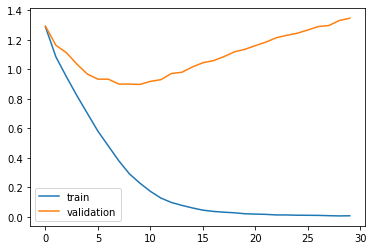

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'])
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(raw_df['Text'], raw_df['Score'])
VOCAB_SIZE = 10000

tokenizer = Tokenizer(num_words=VOCAB_SIZE)

tokenizer.fit_on_texts(X_train)

X_train_enc = tokenizer.texts_to_sequences(X_train)
X_test_enc = tokenizer.texts_to_sequences(X_test)

X_train_enc = pad_sequences(X_train_enc, maxlen=MAX_LEN, padding="post")
X_test_enc = pad_sequences(X_test_enc, maxlen=MAX_LEN, padding="post")

np.mean([len(t) for t in X_train_enc])

y_train_enc = to_categorical(y_train)
y_test_enc = to_categorical(y_test)
print(y_train.iloc[0:10])
print(y_train_enc[0:10])

257847    4
126893    5
339361    3
14453     5
339868    5
155780    4
437003    5
284654    4
372907    3
381493    5
Name: Score, dtype: int64
[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]


In [20]:
EMBEDDING_DIMENSION = 50

model = Sequential()
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIMENSION, input_length=MAX_LEN))
model.add(Conv1D(50, 4, 1, activation='relu'))
model.add(Dropout(0.5))
model.add(GlobalMaxPool1D())
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 50)           500000    
                                                                 
 conv1d_2 (Conv1D)           (None, 97, 50)            10050     
                                                                 
 dropout_1 (Dropout)         (None, 97, 50)            0         
                                                                 
 global_max_pooling1d_2 (Glo  (None, 50)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 6)                 306       
                                                                 
Total params: 510,356
Trainable params: 510,356
Non-trainable params: 0
________________________________________________

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('my_min_loss_model.h5', monitor='val_loss', verbos=1, save_best_only=True, mode='min')

history = model.fit(
    X_train_enc,
    y_train_enc,
    epochs=10,
    batch_size=4096,
    validation_split=0.1,
    callbacks = [mc]
)

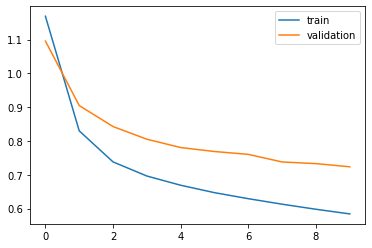

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'])
plt.show()

In [23]:
model.evaluate(X_test_enc, y_test_enc)

4442/4442 [==============================] - 16s 4ms/step - loss: 0.7265 - accuracy: 0.7701


[0.7265186309814453, 0.7700578570365906]

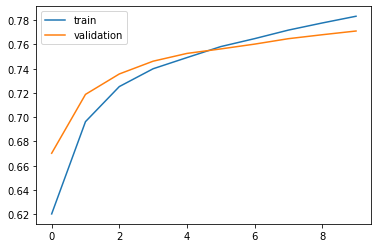

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'validation'])
plt.show()